In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#path ke file CSV di Google drive
file_path1 = '/content/drive/MyDrive/Data Mining/transkip_nilai.csv'
file_path2 = '/content/drive/MyDrive/Data Mining/ms_lulusan.csv'

#membaca file CSV
df_transkip = pd.read_csv(file_path1)
df_lulusan = pd.read_csv(file_path2)

In [ ]:
df_transkip.head()

,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade
0,1,15416255201060,F02160009,Entrepreneurship,Entrepreneurship,Entrepreneurship,3.50,84.25,5,2,B+
1,2,15416255201060,F02160010,Kerja Praktik,Kerja Praktik,Internship,3.75,88.25,6,3,A-
2,3,15416255201060,IF1160020,Desain & Analisis Algoritma,Desain & Analisis Algoritma,Analysis Algorithm & Design,3.50,81.70,3,3,B+
3,4,15416255201060,IF1160021,Analisis & Desain System Berorientasi Obyek,Analisis & Desain System Berorientasi Obyek,Object Oriented Design System,3.75,86.80,3,3,A-
4,5,15416255201060,IF1160022,Pemrograman Berorientasi Objek (*),Pemrograman Berorientasi Objek,Object Oriented Programming,3.75,85.50,3,3,A-


In [ ]:
df_lulusan.head()

,nim,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
2,15416226201003,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1
3,15416226201004,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1
4,15416226201005,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1


**INTEGRASI DAN TRANSFORMASI DATA**

In [ ]:
print(df_transkip.dtypes)

id                int64
nim               int64
kode_mk          object
nama_mk          object
nama_mk_indo     object
nama_mk_ing      object
nilai_grade     float64
nilai_total     float64
semester          int64
sks_mk            int64
grade            object
dtype: object


**MENCARI IPS**

In [ ]:
# Menghitung nilai IPS setiap semester untuk setiap mahasiswa
ips_df = df_transkip.groupby (['nim', 'semester']).apply(
    lambda x: round((x['nilai_grade'] * x['sks_mk']).sum() / x['sks_mk'].sum(), 2)
).reset_index(name='IPS')

#Mengubah format dari baris ke kolom
ips_df = ips_df.pivot(index='nim', columns='semester', values='IPS').reset_index()
ips_df.columns = ['nim'] + [f'IPS SMT{col}' for col in ips_df.columns[1:]]
ips_df.head()

,nim,IPS SMT0,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,IPS SMT9
0,15416226201001,NaN,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,NaN
1,15416226201002,NaN,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,NaN
2,15416226201003,NaN,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,NaN
3,15416226201004,NaN,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,NaN
4,15416226201005,NaN,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,NaN


**GABUNGKAN DENGAN DF_KELULUSAN**

In [ ]:
# menampilkan jumlah data setelah penggabungan
jumlah_data = len(merged_df)
print(f"jumlah data setelah penggabungan : {jumlah_data}")

#gabungkan data
merged_df = pd.merge(ips_df,df_lulusan, on='nim', how='left')

#menampilkan hasil
merged_df.head()

jumlah data setelah penggabungan : 3549


,nim,IPS SMT0,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,IPS SMT9,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,NaN,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201002,NaN,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,NaN,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
2,15416226201003,NaN,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1
3,15416226201004,NaN,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1
4,15416226201005,NaN,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1


In [ ]:
#Konversi kolom tanggal
df_lulusan['tanggal_lulus'] = pd.to_datetime(df_lulusan['tanggal_lulus'], format='%Y-%m-%d')
df_lulusan['tgl_masuk'] = pd.to_datetime(df_lulusan['tgl_masuk'], format='%Y-%m-%d')

#Menghitung durasi studi masing-masing mahasiswa dalam tahun dan bulan
def calculate_study_duration(row):
  start_date = row['tgl_masuk']
  end_date = row['tanggal_lulus']
  duration = end_date - start_date

  years = duration.days // 365
  months = (duration.days % 365) // 30
  return f"{years} Tahun {months} Bulan"

df_lulusan['Lama Kuliah'] = df_lulusan.apply(calculate_study_duration, axis=1)

#Menentukan apakah lulus tepat waktu atau tidak
df_lulusan['Lulus tepat waktu/tidak'] = (df_lulusan['tanggal_lulus'] - df_lulusan['tgl_masuk']).dt.days < 5 * 365
df_lulusan['Lulus tepat waktu/tidak'] = df_lulusan['Lulus tepat waktu/tidak'].map({True: "Tepat waktu", False: "Tidak tepat waktu"})

#Gabungkan IPS dengan data ms_lulusan berdasarkan NIM
merged_df = pd.merge(ips_df, df_lulusan, on='nim')

merged_df.head()

,nim,IPS SMT0,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,...,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,Lama Kuliah,Lulus tepat waktu/tidak
0,15416226201001,NaN,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,...,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 Tahun 12 Bulan,Tepat waktu
1,15416226201002,NaN,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,...,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1,3 Tahun 12 Bulan,Tepat waktu
2,15416226201003,NaN,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,...,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1,3 Tahun 12 Bulan,Tepat waktu
3,15416226201004,NaN,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,...,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1,3 Tahun 12 Bulan,Tepat waktu
4,15416226201005,NaN,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,...,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 Tahun 12 Bulan,Tepat waktu


In [ ]:
#Menghapus data mahasiswa pindahan
merged_df = merged_df.drop(merged_df[merged_df['status_masuk'] == 1].index)

df_status_msk = merged_df[merged_df['status_masuk'] == 1]
jmlh= df_status_msk.shape[0]
print("Jumlah data pada df_status_msk adalah:", jmlh)

Jumlah data pada df_status_msk adalah: 0


In [ ]:
#STANDARISASI JENIS KELAMIN
merged_df['jenis_kelamin'] = merged_df['jenis_kelamin'].replace({0: "Laki-laki", 1: "Perempuan"})
merged_df.head()

,nim,IPS SMT0,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,...,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,Lama Kuliah,Lulus tepat waktu/tidak
0,15416226201001,NaN,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,...,26201,Pujian,2019-08-31,2015-09-06,0,Perempuan,1994,1,3 Tahun 12 Bulan,Tepat waktu
1,15416226201002,NaN,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,...,26201,Pujian,2019-08-31,2015-09-06,0,Laki-laki,1996,1,3 Tahun 12 Bulan,Tepat waktu
2,15416226201003,NaN,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,...,26201,Pujian,2019-08-31,2015-09-06,0,Perempuan,1984,1,3 Tahun 12 Bulan,Tepat waktu
3,15416226201004,NaN,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,...,26201,Pujian,2019-08-31,2015-09-06,0,Perempuan,1996,1,3 Tahun 12 Bulan,Tepat waktu
4,15416226201005,NaN,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,...,26201,Pujian,2019-08-31,2015-09-06,0,Perempuan,1994,1,3 Tahun 12 Bulan,Tepat waktu


**PENYESUAIAN KOLOM YANG AKAN DIGUNAKAN**

In [ ]:
selected_columns = ['nim', 'IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5', 'IPS SMT6', 'IPS SMT7', 'IPS SMT8', 'IPS SMT9', 'predikat', 'tahun_lahir', 'jenis_kelamin', 'status_pegawai', 'Lama Kuliah', 'Lulus tepat waktu/tidak']

#Membuat DataFrame baru dengan kolom yang diseleksi
df_fix = merged_df[selected_columns]

#Menampilkan beberapa baris pertama dari DataFrame baru
df_fix.head()

,nim,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,IPS SMT9,predikat,tahun_lahir,jenis_kelamin,status_pegawai,Lama Kuliah,Lulus tepat waktu/tidak
0,15416226201001,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,NaN,Pujian,1994,Perempuan,1,3 Tahun 12 Bulan,Tepat waktu
1,15416226201002,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,NaN,Pujian,1996,Laki-laki,1,3 Tahun 12 Bulan,Tepat waktu
2,15416226201003,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,NaN,Pujian,1984,Perempuan,1,3 Tahun 12 Bulan,Tepat waktu
3,15416226201004,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,NaN,Pujian,1996,Perempuan,1,3 Tahun 12 Bulan,Tepat waktu
4,15416226201005,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,NaN,Pujian,1994,Perempuan,1,3 Tahun 12 Bulan,Tepat waktu


**DATA CLEEANING**

In [ ]:
import pandas as pd
import numpy as np

# Load the datasets (assuming they are already loaded as df_transkip and df_lulusan)
# Data cleaning

# 1. Menangani kesalahan angka pada tahun lahir
# Asumsi: kolom tahun lahir berada di df_lulusan dan bernama 'tahun_lahir'
# Ambil nilai tahun lahir yang wajar, misalnya dari 1900 hingga 2020
df_lulusan = df_lulusan[(df_lulusan['tahun_lahir'] >= 1900) & (df_lulusan['tahun_lahir'] <= 2020)]

# 2. Menangani status semester yang tidak valid
# Asumsi: kolom semester berada di df_transkip dan bernama 'semester'
# Ambil nilai semester yang wajar, misalnya dari 1 hingga 14
df_transkip = df_transkip[(df_transkip['semester'] >= 1) & (df_transkip['semester'] <= 14)]

# 3. Menangani data anomali lainnya
# Misalnya: cek kolom nilai_grade apakah ada nilai yang tidak wajar
# Asumsi: nilai_grade berada di df_transkip dan bernama 'nilai_grade'
# Ambil nilai_grade yang wajar, misalnya dari 0 hingga 4
df_transkip = df_transkip[(df_transkip['nilai_grade'] >= 0) & (df_transkip['nilai_grade'] <= 4)]

# Mengisi nilai yang hilang dengan cara yang sesuai
# Mengisi nilai hilang pada kolom numerik dengan rata-rata
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Mengisi nilai hilang pada kolom kategorikal dengan modus
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_cols] = merged_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# 4. Menentukan Data Noise dan Outlier
# Misalnya, menggunakan metode IQR untuk mendeteksi dan menghapus outlier
Q1 = merged_df[numeric_cols].quantile(0.25)
Q3 = merged_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
merged_df = merged_df[~((merged_df[numeric_cols] < (Q1 - 1.5 * IQR)) | (merged_df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Konversi tipe data yang sesuai
merged_df['nim'] = merged_df['nim'].astype(str)
merged_df['Lama Kuliah'] = merged_df['Lama Kuliah'].astype(str)

# Menampilkan hasil akhir dari data yang telah dibersihkan
merged_df.head()

# Menampilkan jumlah data setelah pembersihan
jumlah_data_setelah_cleaning = len(merged_df)
print(f"Jumlah data setelah pembersihan: {jumlah_data_setelah_cleaning}")


Jumlah data setelah pembersihan: 3549


<ipython-input-49-0ca879a47a6b>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['nim'] = merged_df['nim'].astype(str)
<ipython-input-49-0ca879a47a6b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Lama Kuliah'] = merged_df['Lama Kuliah'].astype(str)


In [ ]:
# Menampilkan info dataframe untuk melihat kolom dan tipe data
print(merged_df.info())

# Mengidentifikasi kesalahan angka pada tahun lahir
# Misalkan kolom tahun lahir ada pada df_lulusan['tahun_lahir']
# Tentukan range yang masuk akal untuk tahun lahir
tahun_lahir_min = 1970
tahun_lahir_max = 2005

# Filter data yang berada di luar rentang tahun lahir
tahun_lahir_anomali = df_lulusan[(df_lulusan['tahun_lahir'] < tahun_lahir_min) |
                                 (df_lulusan['tahun_lahir'] > tahun_lahir_max)]

# Menampilkan data yang anomali
print("Data dengan kesalahan angka pada tahun lahir:")
print(tahun_lahir_anomali)

# Membersihkan data anomali tahun lahir dengan mengisi nilai null atau mengganti dengan mean/median
df_lulusan.loc[tahun_lahir_anomali.index, 'tahun_lahir'] = None

# Status Semester: Memastikan semester dalam rentang yang masuk akal (1 sampai 14)
semester_min = 1
semester_max = 14

# Filter data yang berada di luar rentang semester
semester_anomali = df_transkip[(df_transkip['semester'] < semester_min) |
                               (df_transkip['semester'] > semester_max)]

# Menampilkan data yang anomali
print("Data dengan kesalahan status semester:")
print(semester_anomali)

# Membersihkan data anomali semester dengan mengisi nilai null atau mengganti dengan mode
df_transkip.loc[semester_anomali.index, 'semester'] = None

# Mengidentifikasi data noise dan outlier pada kolom nilai
# Misalnya, nilai grade harus berada di antara 0 dan 4
nilai_min = 0
nilai_max = 4

# Filter data yang berada di luar rentang nilai
nilai_anomali = df_transkip[(df_transkip['nilai_grade'] < nilai_min) |
                            (df_transkip['nilai_grade'] > nilai_max)]

# Menampilkan data yang anomali
print("Data dengan nilai anomali:")
print(nilai_anomali)

# Membersihkan data anomali nilai dengan mengisi nilai null atau mengganti dengan mean/median
df_transkip.loc[nilai_anomali.index, 'nilai_grade'] = None

# Setelah membersihkan data, kita dapat mengganti nilai null dengan mean atau median
df_lulusan['tahun_lahir'].fillna(df_lulusan['tahun_lahir'].median(), inplace=True)
df_transkip['semester'].fillna(df_transkip['semester'].mode()[0], inplace=True)
df_transkip['nilai_grade'].fillna(df_transkip['nilai_grade'].median(), inplace=True)

# Gabungkan kembali data yang sudah dibersihkan
merged_df_cleaned = pd.merge(ips_df, df_lulusan, on='nim')
merged_df_cleaned = pd.merge(merged_df_cleaned, df_transkip, on='nim')

# Menampilkan hasil setelah pembersihan data
print("Data setelah pembersihan:")
print(merged_df_cleaned.head())

<ipython-input-50-b725b523f770>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lulusan['tahun_lahir'].fillna(df_lulusan['tahun_lahir'].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 3549 entries, 97 to 4525
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   nim                      3549 non-null   object        
 1   IPS SMT0                 3549 non-null   float64       
 2   IPS SMT1                 3549 non-null   float64       
 3   IPS SMT2                 3549 non-null   float64       
 4   IPS SMT3                 3549 non-null   float64       
 5   IPS SMT4                 3549 non-null   float64       
 6   IPS SMT5                 3549 non-null   float64       
 7   IPS SMT6                 3549 non-null   float64       
 8   IPS SMT7                 3549 non-null   float64       
 9   IPS SMT8                 3549 non-null   float64       
 10  IPS SMT9                 3549 non-null   float64       
 11  prodi                    3549 non-null   int64         
 12  predikat                 3549 non-null

**CEK MISSING VALUES**

In [ ]:
# Mengidentifikasi Missing Values
print("Jumlah missing values di setiap kolom:")
missing_values = merged_df_cleaned.isnull().sum()
print(missing_values)

# Presentase missing values
missing_percentage = (missing_values / len(merged_df_cleaned)) * 100
print("\nPresentase missing values di setiap kolom:")
print(missing_percentage)

# Mengatasi Missing Values
# 1. Mengisi missing values dengan mean untuk kolom numerik
# 2. Mengisi missing values dengan mode untuk kolom kategorikal

# Mengisi missing values dengan mean untuk kolom numerik
numerik_kolom = merged_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
merged_df_cleaned[numerik_kolom] = merged_df_cleaned[numerik_kolom].fillna(merged_df_cleaned[numerik_kolom].mean())

# Mengisi missing values dengan mode untuk kolom kategorikal
kategorikal_kolom = merged_df_cleaned.select_dtypes(include=['object']).columns
merged_df_cleaned[kategorikal_kolom] = merged_df_cleaned[kategorikal_kolom].fillna(merged_df_cleaned[kategorikal_kolom].mode().iloc[0])

# Memastikan tidak ada missing values lagi
print("\nJumlah missing values di setiap kolom setelah penanganan:")
missing_values_after = merged_df_cleaned.isnull().sum()
print(missing_values_after)

# Menampilkan 5 baris pertama dari dataframe setelah penanganan missing values
print("\nData setelah penanganan missing values:")
print(merged_df_cleaned.head())


Jumlah missing values di setiap kolom:
nim                             0
IPS SMT0                   254929
IPS SMT1                       75
IPS SMT2                       35
IPS SMT3                        0
IPS SMT4                        0
IPS SMT5                        0
IPS SMT6                        0
IPS SMT7                        0
IPS SMT8                      843
IPS SMT9                   255270
prodi                           0
predikat                        0
tanggal_lulus                   0
tgl_masuk                       0
status_masuk                    0
jenis_kelamin                   0
tahun_lahir                     0
status_pegawai                  0
Lama Kuliah                     0
Lulus tepat waktu/tidak         0
id                              0
kode_mk                         0
nama_mk                         6
nama_mk_indo                    1
nama_mk_ing                     4
nilai_grade                     0
nilai_total                     0
semester 

**Reduction : cek apakah ada data yang duplikat. Bisa berdasarkan NIM sebagai key value.**

In [ ]:
# Mengecek apakah ada data duplikat berdasarkan NIM
duplicate_rows = merged_df_cleaned[merged_df_cleaned.duplicated(subset='nim', keep=False)]
print("Jumlah data yang duplikat berdasarkan NIM:")
print(len(duplicate_rows))

# Menampilkan data yang duplikat
if not duplicate_rows.empty:
    print("\nData yang duplikat:")
    print(duplicate_rows)
else:
    print("\nTidak ada data yang duplikat berdasarkan NIM.")

# Menghapus data duplikat
merged_df_cleaned.drop_duplicates(subset='nim', keep='first', inplace=True)

# Memastikan tidak ada data yang duplikat lagi
print("\nJumlah data setelah menghapus duplikasi:")
print(len(merged_df_cleaned))

# Menampilkan 5 baris pertama dari dataframe setelah penghapusan duplikasi
print("\nData setelah penghapusan duplikasi:")
print(merged_df_cleaned.head())


Jumlah data yang duplikat berdasarkan NIM:
256089

Data yang duplikat:
                   nim  IPS SMT0  IPS SMT1  IPS SMT2  IPS SMT3  IPS SMT4  \
0       15416226201001  3.338957       3.2      3.40      2.93      2.99   
1       15416226201001  3.338957       3.2      3.40      2.93      2.99   
2       15416226201001  3.338957       3.2      3.40      2.93      2.99   
3       15416226201001  3.338957       3.2      3.40      2.93      2.99   
4       15416226201001  3.338957       3.2      3.40      2.93      2.99   
...                ...       ...       ...       ...       ...       ...   
256084  20416286206132  3.338957       3.8      3.82      3.74      3.76   
256085  20416286206132  3.338957       3.8      3.82      3.74      3.76   
256086  20416286206132  3.338957       3.8      3.82      3.74      3.76   
256087  20416286206132  3.338957       3.8      3.82      3.74      3.76   
256088  20416286206132  3.338957       3.8      3.82      3.74      3.76   

        IPS SMT5

**PETTERN**

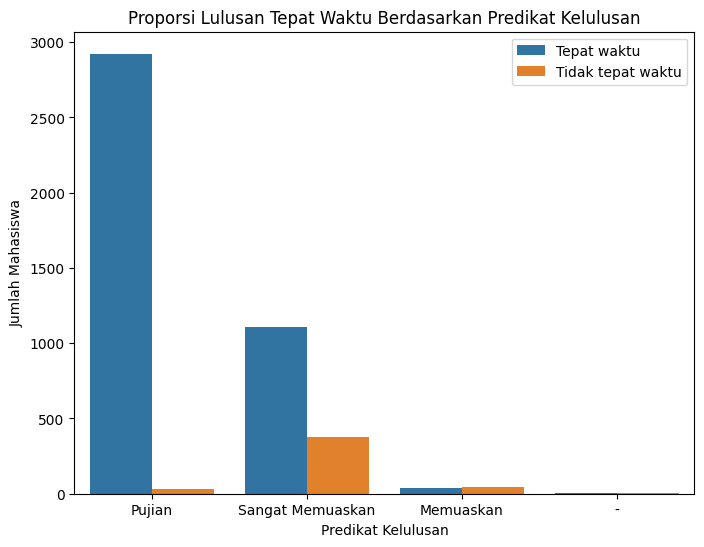

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='predikat', hue='Lulus tepat waktu/tidak', data=df_fix)
plt.title('Proporsi Lulusan Tepat Waktu Berdasarkan Predikat Kelulusan')
plt.xlabel('Predikat Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(loc='upper right')
plt.show()

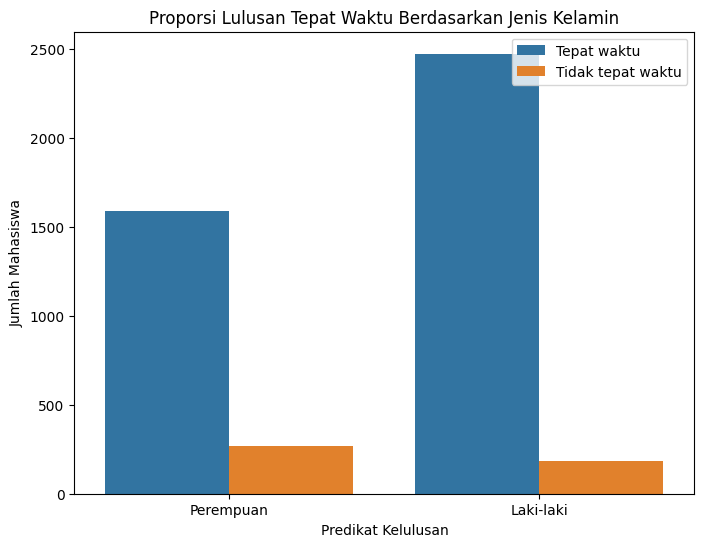

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='jenis_kelamin', hue='Lulus tepat waktu/tidak', data=df_fix)
plt.title('Proporsi Lulusan Tepat Waktu Berdasarkan Jenis Kelamin')
plt.xlabel('Predikat Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(loc='upper right')
plt.show()

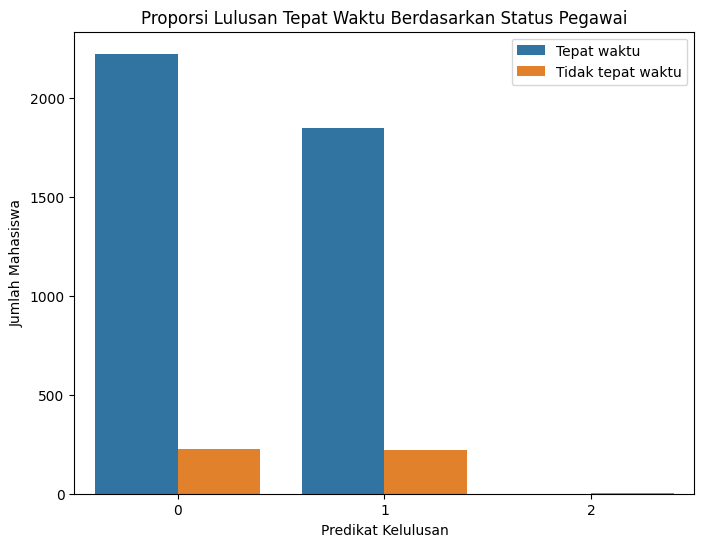

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='status_pegawai', hue='Lulus tepat waktu/tidak', data=df_fix)
plt.title('Proporsi Lulusan Tepat Waktu Berdasarkan Status Pegawai')
plt.xlabel('Predikat Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(loc='upper right')
plt.show()

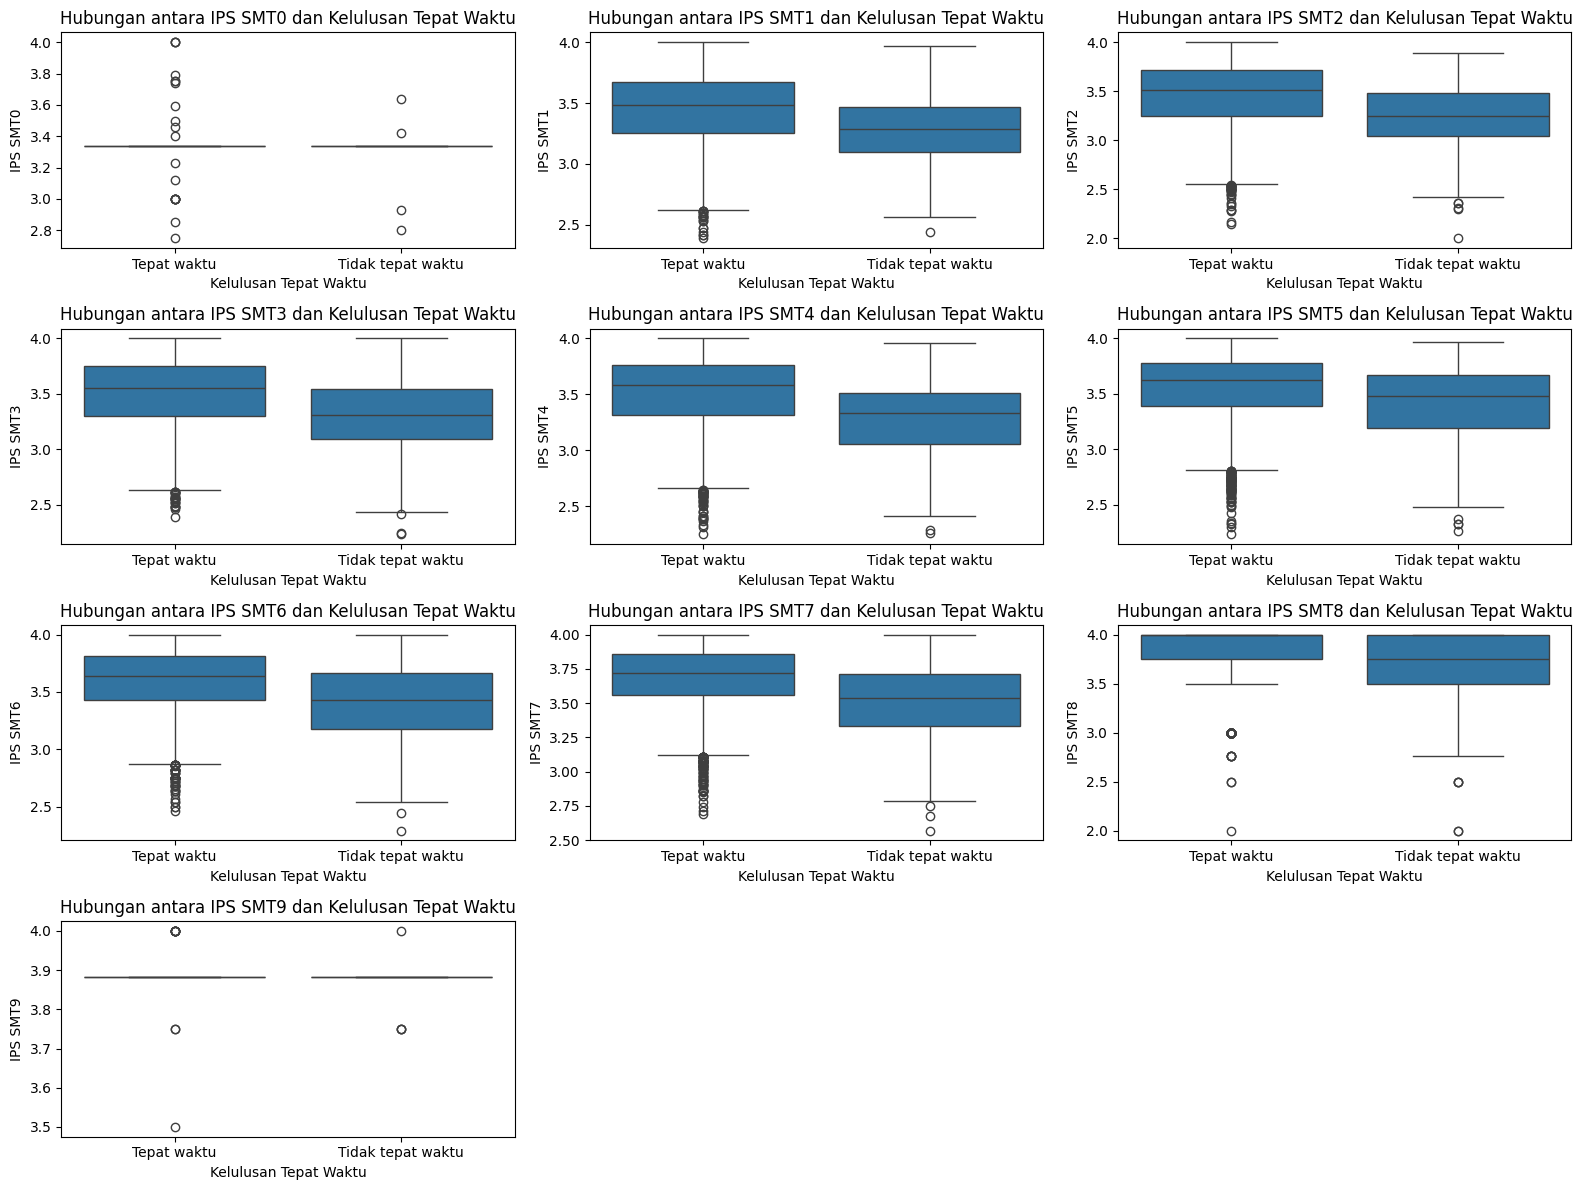

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List kolom IPS semester
ips_columns = [col for col in merged_df_cleaned.columns if col.startswith('IPS SMT')]

# Hitung jumlah IPS semester
num_ips_semesters = len(ips_columns)

# Tentukan ukuran grid subplot sesuai dengan jumlah IPS semester
num_rows = (num_ips_semesters // 3) + (1 if num_ips_semesters % 3 != 0 else 0)
num_cols = min(num_ips_semesters, 3)

# Plotting box plot untuk setiap IPS semester
plt.figure(figsize=(16, 12))
for i, col in enumerate(ips_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='Lulus tepat waktu/tidak', y=col, data=merged_df_cleaned)
    plt.title(f'Hubungan antara {col} dan Kelulusan Tepat Waktu')
    plt.xlabel('Kelulusan Tepat Waktu')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()


# **MELAKUKAN PREDIKSI KELULUSAN TEPAT WAKTU PADA MAHASISWA MENGGUNAKAN ALGORITMA SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Pisahkan fitur (X) dan label (y)
X = merged_df_cleaned[['IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5',
                       'IPS SMT6', 'IPS SMT7', 'IPS SMT8', 'IPS SMT9', 'tahun_lahir',
                       'jenis_kelamin', 'status_pegawai']]
y = merged_df_cleaned['Lulus tepat waktu/tidak']

# Pemisahan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur-fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM
svm_model.fit(X_train_scaled, y_train)

# Prediksi dengan data test
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model
try:
    # Pastikan jumlah sampel X_test dan y_test konsisten
    assert len(X_test) == len(y_test), "Jumlah sampel X_test dan y_test tidak sama"
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi SVM: {accuracy:.2f}')

    # Menampilkan laporan klasifikasi
    print(classification_report(y_test, y_pred))

    # Menampilkan confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except AssertionError as e:
    print(f"Error: {e}")

except Exception as e:
    print(f"Error: {e}")


Akurasi SVM: 0.90
                   precision    recall  f1-score   support

      Tepat waktu       0.90      1.00      0.95       812
Tidak tepat waktu       0.00      0.00      0.00        94

         accuracy                           0.90       906
        macro avg       0.45      0.50      0.47       906
     weighted avg       0.80      0.90      0.85       906

Confusion Matrix:
 [[812   0]
 [ 94   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**DATA TESTING DAN TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Pemisahan fitur (X) dan label (y)
X = merged_df_cleaned[['IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5',
                       'IPS SMT6', 'IPS SMT7', 'IPS SMT8', 'IPS SMT9', 'tahun_lahir',
                       'jenis_kelamin', 'status_pegawai']]
y = merged_df_cleaned['Lulus tepat waktu/tidak']

# Encode categorical variables (jenis_kelamin and status_pegawai)
X = pd.get_dummies(X, columns=['jenis_kelamin', 'status_pegawai'], drop_first=True)

# Pemisahan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur-fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menampilkan hasil pemisahan dan standardisasi
print("Data Training (X_train_scaled):")
print(X_train_scaled[:5])  # Menampilkan 5 baris pertama data training yang sudah diskalakan

print("\nData Testing (X_test_scaled):")
print(X_test_scaled[:5])  # Menampilkan 5 baris pertama data testing yang sudah diskalakan

print("\nLabel Training (y_train):")
print(y_train[:5])  # Menampilkan 5 label pertama data training

print("\nLabel Testing (y_test):")
print(y_test[:5])  # Menampilkan 5 label pertama data testing


Data Training (X_train_scaled):
[[-1.03130709 -0.5684863  -0.7351328  -1.53254827 -0.62459309 -0.77606241
   0.32358869  0.69006926 -0.00522267 -0.07545502  1.19086929  1.07818601
  -0.02351152]
 [-0.92940831  0.89352443  0.94006811  0.06579672  0.7254507   1.16785257
   0.90674334  0.69006926 -0.00522267  1.02594493  1.19086929  1.07818601
  -0.02351152]
 [-1.98236237 -1.73212749 -2.16215581 -1.22517423 -2.00756478 -2.01309922
  -0.71775889 -1.40640356 -0.00522267 -0.07545502  1.19086929 -0.92748375
  -0.02351152]
 [-1.43890221 -1.49343186 -0.64206608 -0.73337577  0.19860434 -0.49331114
   0.03201137  0.69006926 -0.00522267 -0.35080501  1.19086929 -0.92748375
  -0.02351152]
 [ 1.07460103  1.25156787  1.34335722  1.26455547  0.85716229  1.48594775
   1.07335895  0.69006926 -0.00522267  1.02594493 -0.83972272 -0.92748375
  -0.02351152]]

Data Testing (X_test_scaled):
[[-0.25008311 -0.38946458  1.18824603  0.74201961  0.33031593  0.53166221
   0.78178163  0.69006926 -0.00522267  0.475244

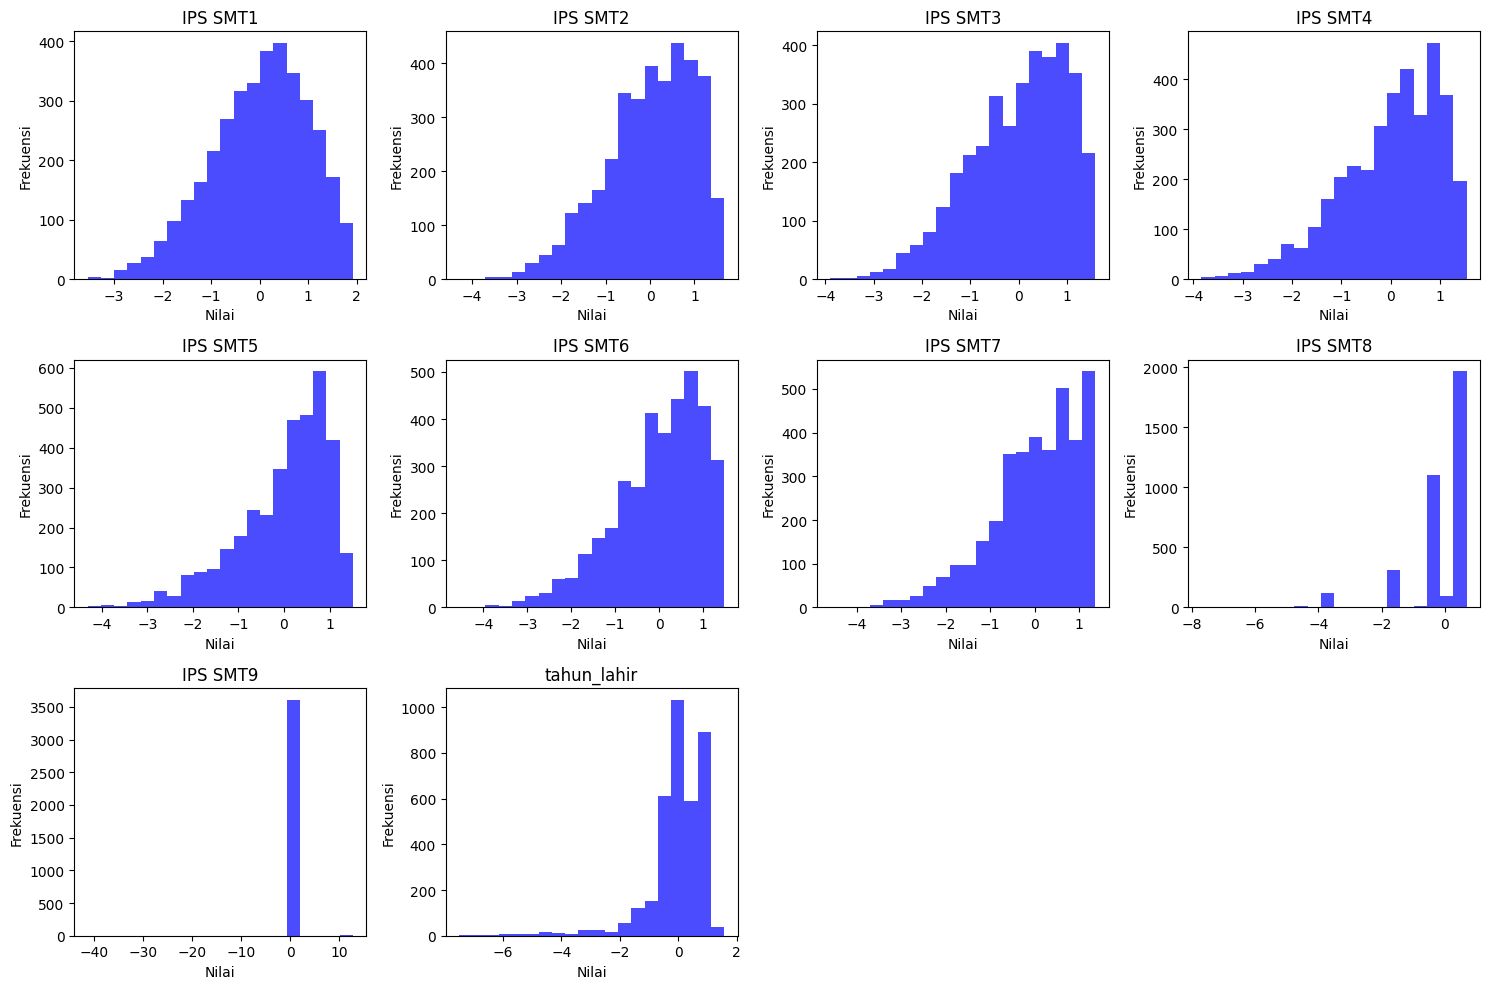

In [ ]:
import matplotlib.pyplot as plt

# Memilih fitur numerik yang ingin divisualisasikan
fitur_numerik = ['IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5',
                 'IPS SMT6', 'IPS SMT7', 'IPS SMT8', 'IPS SMT9', 'tahun_lahir']

# Membuat histogram untuk setiap fitur numerik dalam X_train_scaled
plt.figure(figsize=(15, 10))
for i, feature in enumerate(fitur_numerik):
    plt.subplot(3, 4, i + 1)
    plt.hist(X_train_scaled[:, i], bins=20, color='blue', alpha=0.7)
    plt.title(feature)
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


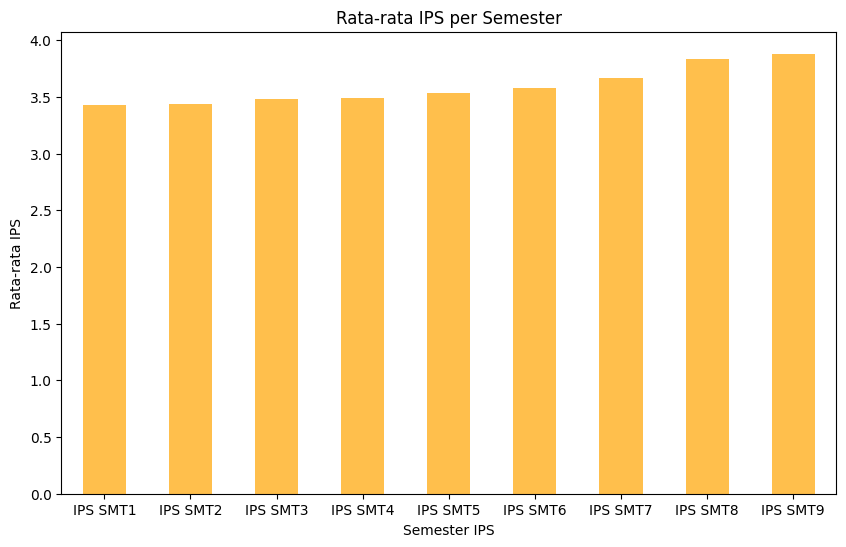

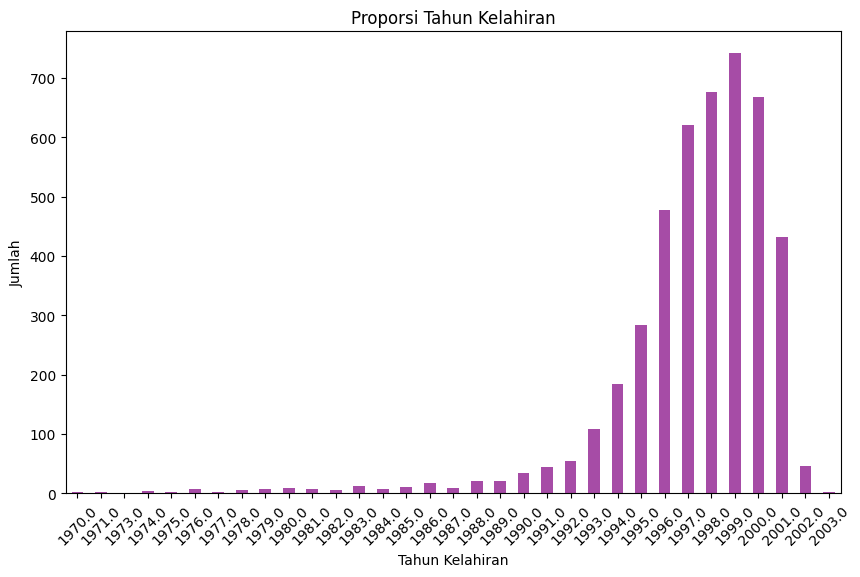

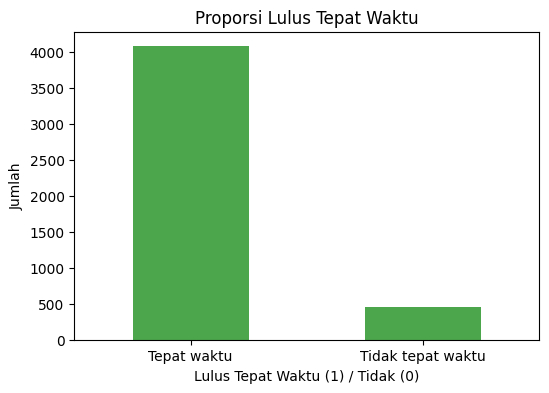

In [ ]:
import matplotlib.pyplot as plt

# Gabungkan X_train dan X_test dengan labelnya
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Visualisasi proporsi variabel 'IPS SMT' (misalnya IPS SMT1 - IPS SMT9)
ips_columns = [col for col in X_combined.columns if col.startswith('IPS SMT')]
plt.figure(figsize=(10, 6))
X_combined[ips_columns].mean().plot(kind='bar', color='orange', alpha=0.7)
plt.title('Rata-rata IPS per Semester')
plt.xlabel('Semester IPS')
plt.ylabel('Rata-rata IPS')
plt.xticks(rotation=0)
plt.show()

# Visualisasi proporsi variabel 'tahun_lahir'
plt.figure(figsize=(10, 6))
X_combined['tahun_lahir'].value_counts().sort_index().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Proporsi Tahun Kelahiran')
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# Visualisasi proporsi variabel 'Lulus tepat waktu/tidak'
plt.figure(figsize=(6, 4))
y_combined.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Proporsi Lulus Tepat Waktu')
plt.xlabel('Lulus Tepat Waktu (1) / Tidak (0)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Pisahkan fitur (X) dan label (y)
X = merged_df_cleaned[['IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5',
                       'IPS SMT6', 'IPS SMT7', 'IPS SMT8', 'IPS SMT9', 'tahun_lahir',
                       'jenis_kelamin', 'status_pegawai']]
y = merged_df_cleaned['Lulus tepat waktu/tidak']

# Pemisahan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur-fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Implementasi Model
y_pred = svm_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi SVM: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi SVM: 0.90
                   precision    recall  f1-score   support

      Tepat waktu       0.90      1.00      0.95       812
Tidak tepat waktu       0.00      0.00      0.00        94

         accuracy                           0.90       906
        macro avg       0.45      0.50      0.47       906
     weighted avg       0.80      0.90      0.85       906



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[812   0]
 [ 94   0]]


Akurasi SVM: 0.90
                   precision    recall  f1-score   support

      Tepat waktu       0.90      1.00      0.95       812
Tidak tepat waktu       0.00      0.00      0.00        94

         accuracy                           0.90       906
        macro avg       0.45      0.50      0.47       906
     weighted avg       0.80      0.90      0.85       906



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


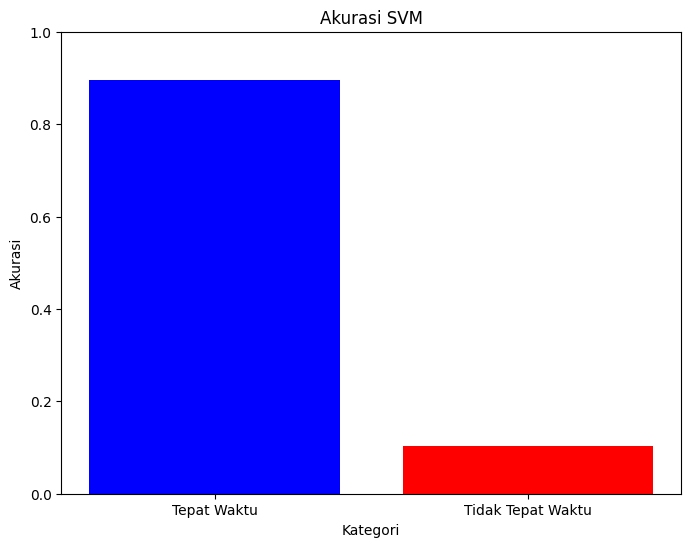

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi SVM: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Plotting akurasi
labels = ['Tepat Waktu', 'Tidak Tepat Waktu']
accuracy_values = [accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred)]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_values, color=['blue', 'red'])
plt.xlabel('Kategori')
plt.ylabel('Akurasi')
plt.title('Akurasi SVM')
plt.ylim([0, 1])
plt.show()

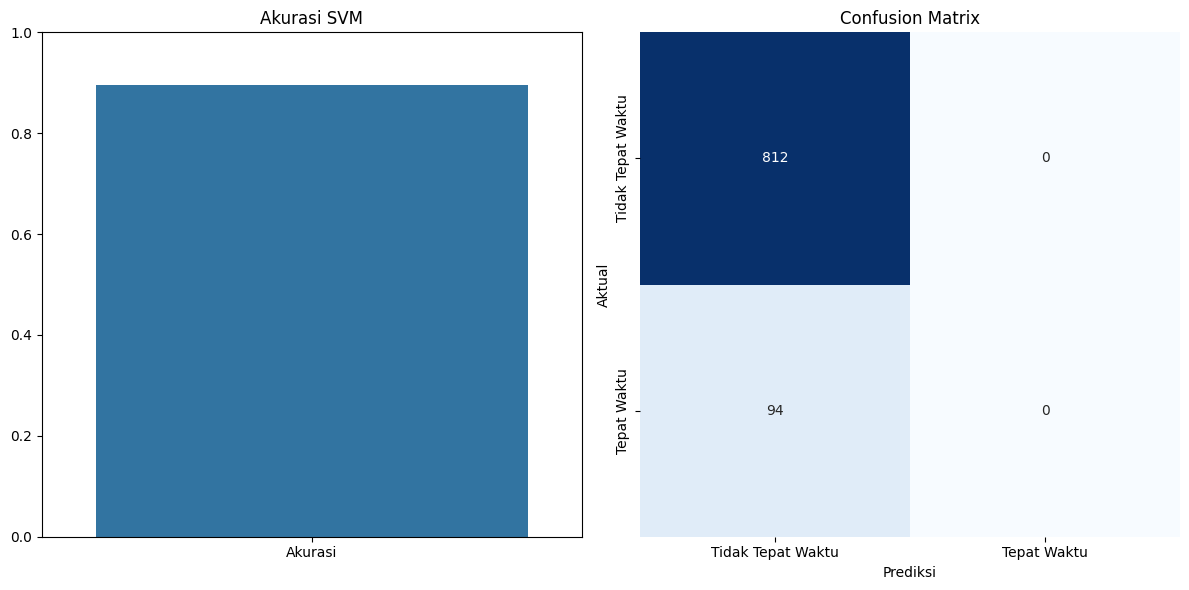

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Plot diagram batang
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
sns.barplot(x=['Akurasi'], y=[accuracy])
plt.title('Akurasi SVM')
plt.ylim(0, 1)  # Batasi sumbu y antara 0 dan 1

# Plot Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Tidak Tepat Waktu', 'Tepat Waktu'],
            yticklabels=['Tidak Tepat Waktu', 'Tepat Waktu'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


**EVALUASI**

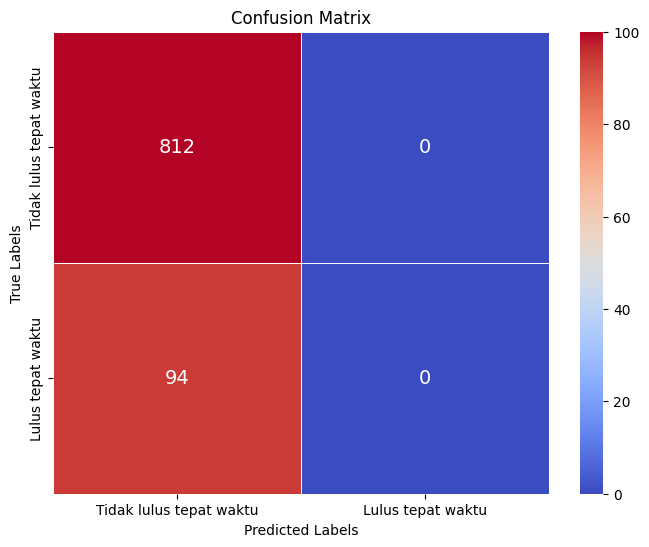

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label untuk confusion matrix
labels = ['Tidak lulus tepat waktu', 'Lulus tepat waktu']

# Plot confusion matrix dengan palet warna coolwarm
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d", cbar=True,
            annot_kws={"size": 14}, linewidths=0.5, xticklabels=labels, yticklabels=labels,
            vmin=0, vmax=100)  # Sesuaikan vmin dan vmax sesuai dengan nilai tertinggi dalam confusion matrix
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
